In [86]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [87]:
#create a pandas dataframes from csv files
users = pd.read_csv('new_users.csv', lineterminator='\n', index_col=0)
users.head(2)

,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used,like/statuses
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,132,5,0,5,13,0,37,0.04
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,122,3,0,6,4,0,41,0.05


In [88]:
users_clean = users.drop(columns= ['subscribing_date', 'lang', 'name', 'bot', 'like/statuses', 'statuses_count', 'user_id'] , axis=1)
users_clean.head(5)

,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used
0,132,5,0,5,13,0,37
1,122,3,0,6,4,0,41
2,4,0,0,0,0,0,0
3,1434,631,0,248,92,36,3
4,3650,61,0,223,475,3,1913


# Kmeans

### Find best k with elbow method

In [89]:
scaler = StandardScaler()
X = users_clean
X_scaler = scaler.fit_transform(X)

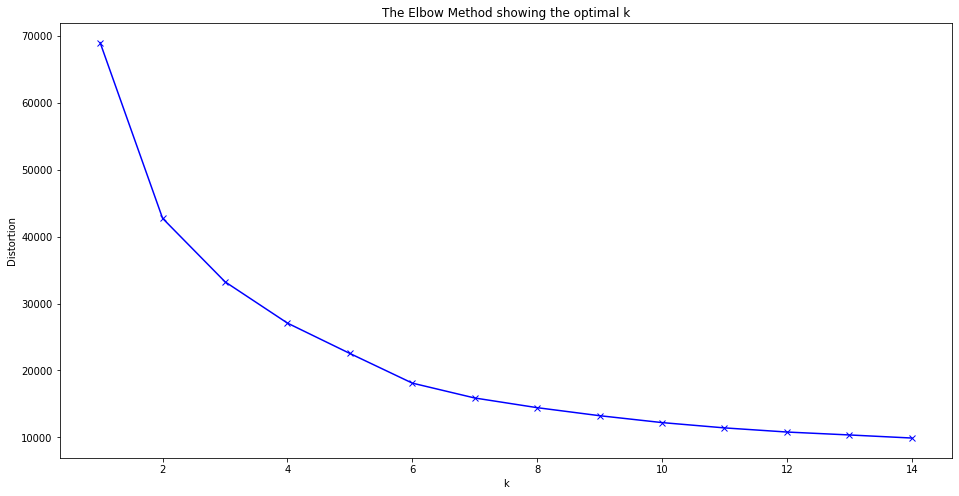

In [90]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaler)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [105]:
kmeanModel = KMeans(n_clusters=6)
kmeanModel.fit(X_scaler)

KMeans(n_clusters=3)

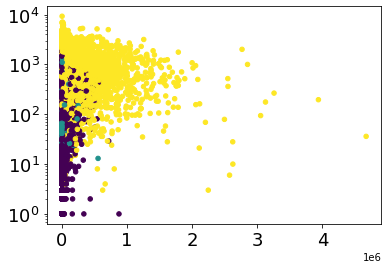

In [107]:
plt.scatter(users_clean['retweet_received'], users_clean['favorite_received'], c=kmeanModel.labels_, s=20)
plt.tick_params(labelsize=18)
plt.yscale('log')
plt.show()